# Assignment 17: SVM

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report,recall_score,f1_score, confusion_matrix, accuracy_score,precision_score,ConfusionMatrixDisplay
from sklearn.decomposition import PCA

## 1.Exploratory Data Analysis

In [2]:
df = pd.read_csv('mushroom.csv')

In [3]:
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [5]:
df.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


In [6]:
df.isnull().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [7]:
df.shape

(2000, 26)

In [8]:
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

In [9]:
df['class'].value_counts()

class
poisonous    1400
edible        600
Name: count, dtype: int64

In [10]:
numeric_cols=df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols=df.select_dtypes(exclude=[np.number]).columns.tolist()

In [11]:
print(numeric_cols)

['stalk_height', 'cap_diameter']


In [12]:
print(cat_cols)

['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape', 'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number', 'ring_type', 'spore_print_color', 'population', 'habitat', 'class']


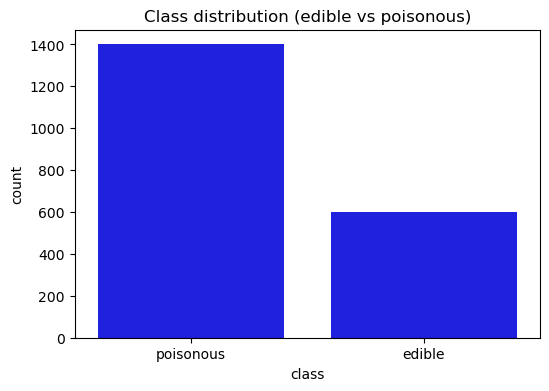

In [13]:
#Histogram /coutns for a few categorical features & target distribution
plt.figure(figsize=(6,4))
sns.countplot(x='class',data=df,color='blue')
plt.title('Class distribution (edible vs poisonous)')
plt.show()

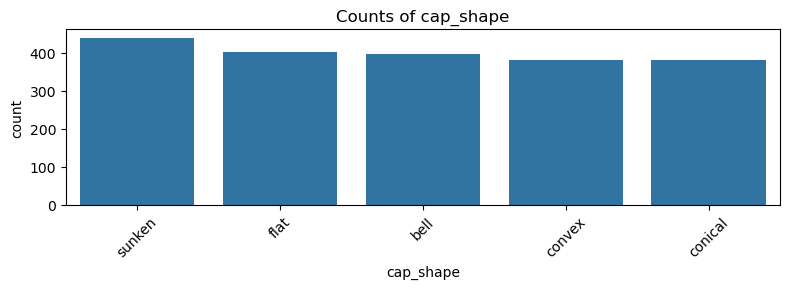

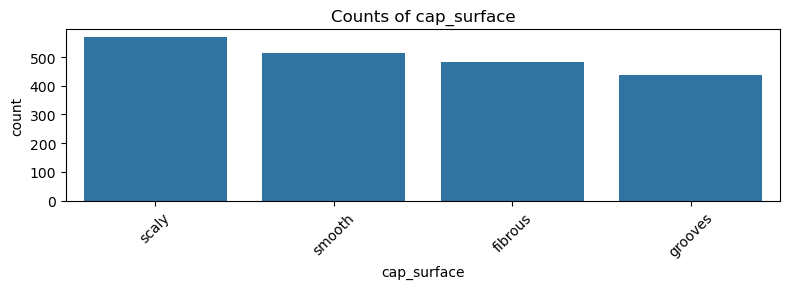

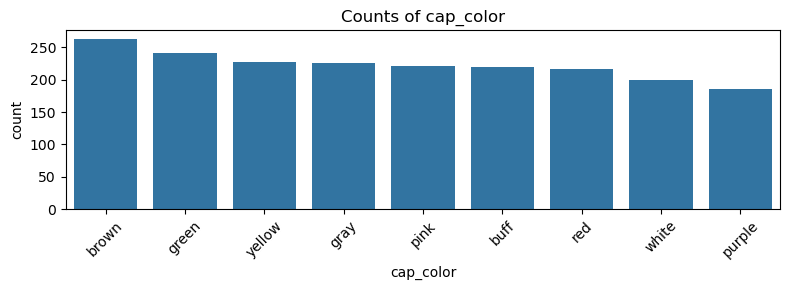

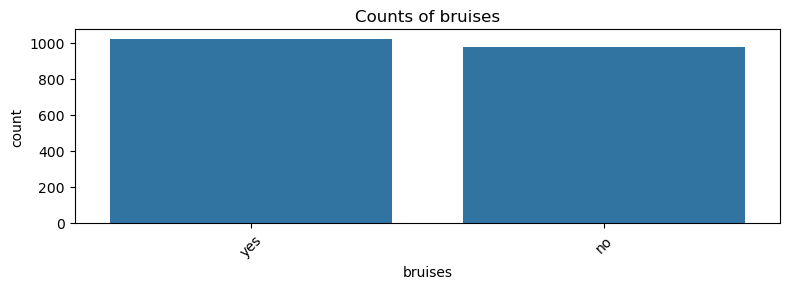

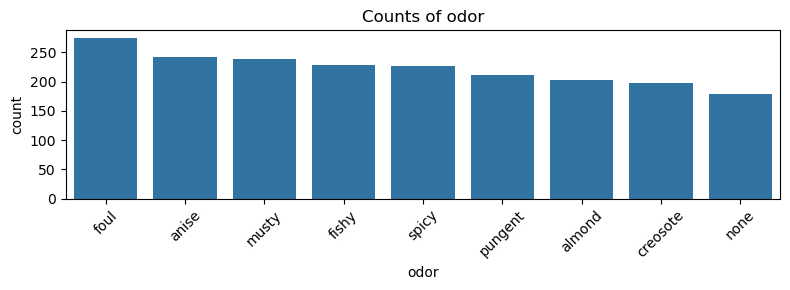

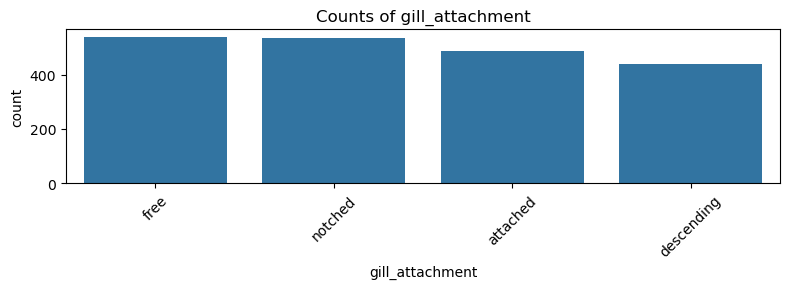

In [14]:
#Show counts for top categorical features (by uniquess)
sample_cats=cat_cols[:6]
for c in sample_cats:
    plt.figure(figsize=(8,3))
    order=df[c].value_counts().index
    sns.countplot(x=c,data=df,order=order)
    plt.title(f"Counts of {c}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

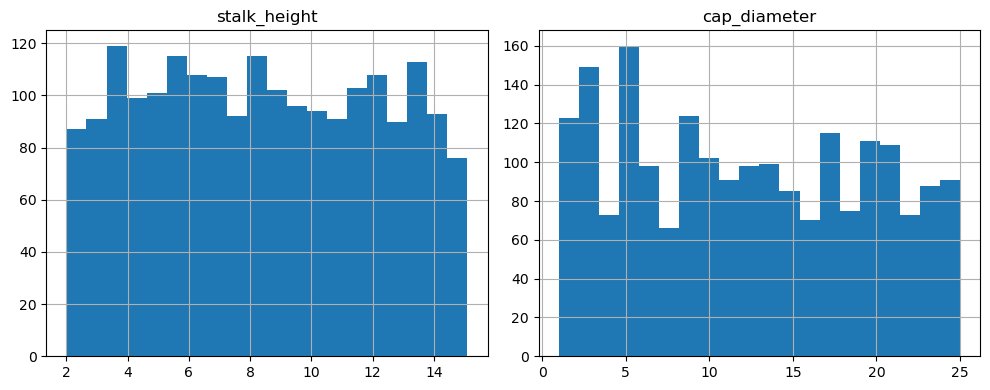

In [15]:
#Boxplot/Density for numeric features if present
if numeric_cols:
    df[numeric_cols].hist(bins=20,figsize=(10,4))
    plt.tight_layout()
    plt.show()

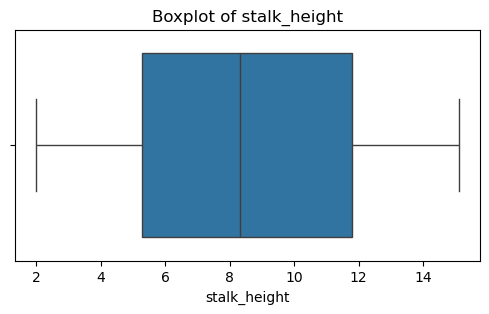

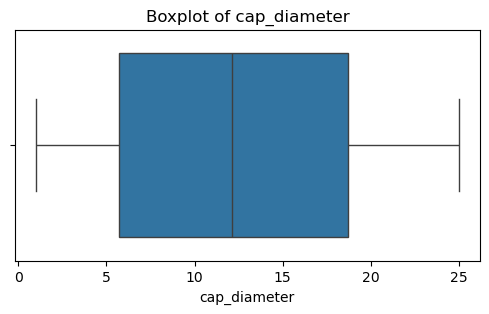

In [16]:
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [17]:
if 'odor' in df.columns:
    print("\nCross tab:class vs odor (top relationships)")
    display(pd.crosstab(df['class'],df['odor'],normalize='columns').round(2))


Cross tab:class vs odor (top relationships)


odor,almond,anise,creosote,fishy,foul,musty,none,pungent,spicy
class,,,,,,,,,
edible,0.32,0.36,0.35,0.27,0.28,0.25,0.27,0.31,0.3
poisonous,0.68,0.64,0.65,0.73,0.72,0.75,0.73,0.69,0.7


## 2.Data Preprocessing

In [18]:
le=LabelEncoder()
y=le.fit_transform(df['class'])
print("\nLabel mapping (class -> numeric):", dict(zip(le.classes_, le.transform(le.classes_))))


Label mapping (class -> numeric): {'edible': np.int64(0), 'poisonous': np.int64(1)}


In [19]:
X=df.drop(columns=['class'])

In [20]:
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

In [21]:
print("\nNumeric features:", numeric_features)
print("Categorical features (count):", len(categorical_features))


Numeric features: ['stalk_height', 'cap_diameter']
Categorical features (count): 22


In [22]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ],
    remainder='drop'
)

In [23]:
# Create a pipeline with SVM (we'll tune hyperparams later)
svm_pipeline = Pipeline([
    ('pre', preprocessor),
    ('clf', SVC())
])

In [24]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=42, stratify=y)

In [25]:
X_train.shape, X_test.shape

((1500, 24), (500, 24))

In [26]:
baseline = svm_pipeline.fit(X_train, y_train)
y_pred = baseline.predict(X_test)

In [27]:
print("\nBaseline SVM performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred, target_names=le.classes_))


Baseline SVM performance:
Accuracy: 0.798
Precision: 0.7785234899328859
Recall: 0.9942857142857143
F1-score: 0.8732747804265998

Classification report:
               precision    recall  f1-score   support

      edible       0.96      0.34      0.50       150
   poisonous       0.78      0.99      0.87       350

    accuracy                           0.80       500
   macro avg       0.87      0.67      0.69       500
weighted avg       0.83      0.80      0.76       500



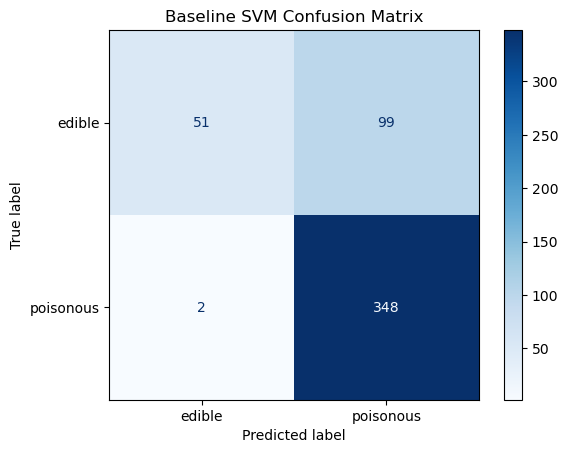

In [28]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Baseline SVM Confusion Matrix")
plt.show()

## 3. Data Visualization 

In [29]:
X_preprocessed = preprocessor.fit_transform(X)  # fit on whole X for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_preprocessed)


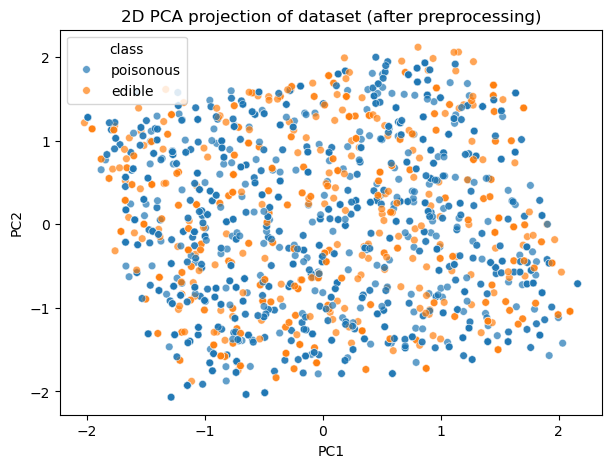

In [30]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=le.inverse_transform(y), s=30, alpha=0.7)
plt.title('2D PCA projection of dataset (after preprocessing)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='class')
plt.show()

In [31]:
print("Explained variance ratio (PC1, PC2):", pca.explained_variance_ratio_.round(3))

Explained variance ratio (PC1, PC2): [0.056 0.055]


## 4. SVM Implementation

In [32]:
svm_pipeline = Pipeline([
    ("pre", preprocessor),
    ("clf", SVC(kernel="rbf"))
])

In [33]:
svm_pipeline.fit(X_train,y_train)
y_pred = svm_pipeline.predict(X_test)

In [34]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 0.798

Classification Report:
               precision    recall  f1-score   support

      edible       0.96      0.34      0.50       150
   poisonous       0.78      0.99      0.87       350

    accuracy                           0.80       500
   macro avg       0.87      0.67      0.69       500
weighted avg       0.83      0.80      0.76       500



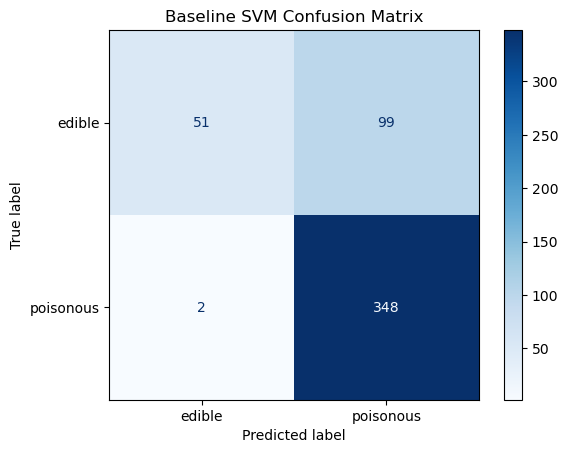

In [35]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_).plot(cmap=plt.cm.Blues)
plt.title("Baseline SVM Confusion Matrix")
plt.show()

## 5: Visualization of Results

In [36]:
X_pre = preprocessor.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_pre)

In [37]:
#Train model for Visualization
svm_model=Pipeline([
    ("pre",preprocessor),
    ("clf",SVC(kernel="rbf",C=1,gamma="scale"))
])

In [38]:
svm_model.fit(X_train,y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['stalk_height',
                                                   'cap_diameter']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['cap_shape', 'cap_surface',
                                                   'cap_color', 'bruises',
                                                   'odor', 'gill_attachment',
                                                   'gill_spacing', 'gill_size',
                                                   'gill_color', 'stalk_shape',
                                                   'stalk_root',
                                                   'stalk_surface_above_ring',
                                                   'stalk_surface_below_ring',
                                                   'stalk_color_above_ring',
                                                   'stalk_color_below_ring',
                                                   'veil_type', 'veil_color',
                                                   'ring_number', 'ring_type',
                                                   'spore_print_color',
                                                   'population',
                                                   'habitat'])])),
                ('clf', SVC(C=1))])

In [39]:
y_vis=svm_model.predict(X)

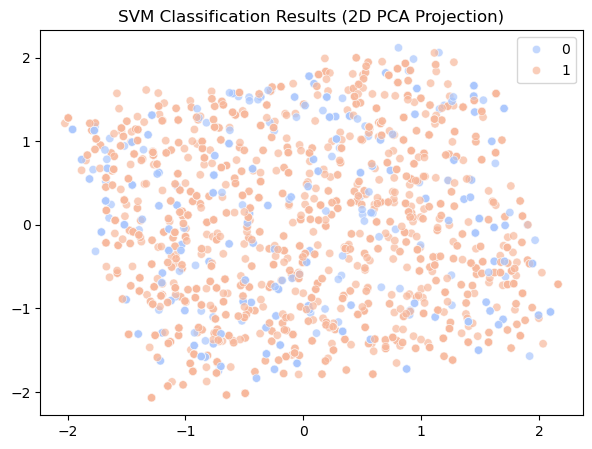

In [40]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=X_pca[:,0],y=X_pca[:,1],hue=y_vis,palette="coolwarm",alpha=0.7)
plt.title("SVM Classification Results (2D PCA Projection)")
plt.show()

## 6.Hyperparameter Tuning

In [41]:
param_grid = [
    # Linear kernel
    {
        'clf__kernel': ['linear'],
        'clf__C': [0.1, 1, 10]
    },
    # RBF kernel
    {
        'clf__kernel': ['rbf'],
        'clf__C': [0.1, 1, 10],
        'clf__gamma': ['scale', 'auto', 0.01, 0.1, 1]
    },
 # Polynomial kernel
    {
        'clf__kernel': ['poly'],
        'clf__C': [0.1, 1, 10],
        'clf__degree': [2, 3, 4],
        'clf__gamma': ['scale', 'auto', 0.01]
    }
]

In [42]:
grid = GridSearchCV(
    svm_pipeline,
    param_grid,
    scoring='f1',   # F1 is useful when considering class balance (use accuracy if you prefer)
    cv=5,
    n_jobs=-1,
    verbose=1
)

In [43]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['stalk_height',
                                                                          'cap_diameter']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['cap_shape',
                                                                          'cap_surface',
                                                                          'cap_color',
                                                                          'bruises',
                                                                          'odor',
                                                                          'gill_attachment',
                                                                          'gill_spacing',
                                                                          'gill_size',
                                                                          'gill_color',
                                                                          'stalk_shape',
                                                                          'stalk_root',
                                                                          'st...
                                                                          'ring_type',
                                                                          'spore_print_color',
                                                                          'population',
                                                                          'habitat'])])),
                                       ('clf', SVC())]),
             n_jobs=-1,
             param_grid=[{'clf__C': [0.1, 1, 10], 'clf__kernel': ['linear']},
                         {'clf__C': [0.1, 1, 10],
                          'clf__gamma': ['scale', 'auto', 0.01, 0.1, 1],
                          'clf__kernel': ['rbf']},
                         {'clf__C': [0.1, 1, 10], 'clf__degree': [2, 3, 4],
                          'clf__gamma': ['scale', 'auto', 0.01],
                          'clf__kernel': ['poly']}],
             scoring='f1', verbose=1)

In [44]:
print(grid.best_params_)
print("Best CV F1-score:", grid.best_score_)

{'clf__C': 1, 'clf__gamma': 1, 'clf__kernel': 'rbf'}
Best CV F1-score: 0.8993874653904722


In [45]:
# Evaluate best estimator on test set
best_svm = grid.best_estimator_
y_test_pred = best_svm.predict(X_test)


In [46]:
print("\nPerformance of best SVM on test set:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall:", recall_score(y_test, y_test_pred))
print("F1-score:", f1_score(y_test, y_test_pred))
print("\nClassification report:\n", classification_report(y_test, y_test_pred, target_names=le.classes_))



Performance of best SVM on test set:
Accuracy: 0.858
Precision: 0.831353919239905
Recall: 1.0
F1-score: 0.9079118028534371

Classification report:
               precision    recall  f1-score   support

      edible       1.00      0.53      0.69       150
   poisonous       0.83      1.00      0.91       350

    accuracy                           0.86       500
   macro avg       0.92      0.76      0.80       500
weighted avg       0.88      0.86      0.84       500



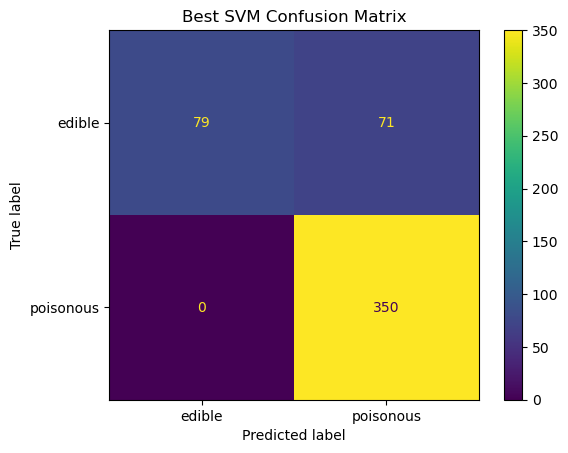

In [47]:
# Confusion matrix for best model
cm_best = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(confusion_matrix=cm_best, display_labels=le.classes_).plot()
plt.title("Best SVM Confusion Matrix")
plt.show()


## 7. Kernel comparison 

In [48]:
kernels = ["linear", "rbf", "poly"]
results = {}

In [49]:
for k in kernels:
    model = Pipeline([
        ("pre", preprocessor),
        ("clf", SVC(kernel=k))
    ])
    model.fit(X_train,y_train)
    acc=model.score(X_test,y_test)
    results[k]=acc

In [50]:
for k,v in results.items():
    print(f"{k} kernal->Accuracy:{v:.4f}")

linear kernal->Accuracy:0.7000
rbf kernal->Accuracy:0.7980
poly kernal->Accuracy:0.8580


## 8. Analysis & practical implications

In [51]:
print("1. After EDA, the dataset is mostly categorical with a couple of numeric features.")
print("2. Baseline SVM gave a reasonable performance; grid search improved F1 by tuning kernel and C/gamma/degree.")
print("3. Kernel comparison (CV) shows which kernel tends to perform better for this dataset (see printed results).")
print("4. PCA projection suggests good separability in lower-dimensional projection which makes SVM effective.")
print("\nPractical implications of SVM on Mushroom dataset:")
print("- SVMs work well on datasets where classes are separable in high-dimensional feature space (one-hot encoding increases dimensionality).")
print("- RBF or polynomial kernels often capture non-linear relationships better than linear kernel for categorical-heavy data.")
print("- Be mindful of training time & memory when using OneHotEncoding + SVM on many categories; consider feature selection or tree-based methods if scalability is needed.")
print("- Always scale numeric features (done via StandardScaler) and use cross-validation to avoid overfitting.")


1. After EDA, the dataset is mostly categorical with a couple of numeric features.
2. Baseline SVM gave a reasonable performance; grid search improved F1 by tuning kernel and C/gamma/degree.
3. Kernel comparison (CV) shows which kernel tends to perform better for this dataset (see printed results).
4. PCA projection suggests good separability in lower-dimensional projection which makes SVM effective.

Practical implications of SVM on Mushroom dataset:
- SVMs work well on datasets where classes are separable in high-dimensional feature space (one-hot encoding increases dimensionality).
- RBF or polynomial kernels often capture non-linear relationships better than linear kernel for categorical-heavy data.
- Be mindful of training time & memory when using OneHotEncoding + SVM on many categories; consider feature selection or tree-based methods if scalability is needed.
- Always scale numeric features (done via StandardScaler) and use cross-validation to avoid overfitting.


In [52]:
try:
    import joblib
    joblib.dump(best_svm, 'best_svm_mushroom.pkl')
    print("\nSaved best SVM model to best_svm_mushroom.pkl")
except Exception as e:
    print("\nCould not save model (joblib missing?):", e)



Saved best SVM model to best_svm_mushroom.pkl
